In [39]:
import torch
import sys
import os
import pandas as pd
import numpy as np
import argparse
import yaml
import matplotlib.pyplot as plt
sys.path.append(os.path.join("..", ".."))
from mmd.mmd import MMD_with_sample
from scipy.signal import resample
from dataloaders.dataloader_HARVAR_har import HARVARUtils
from dataloaders.dataloader_HARVAR_har import HARVAR_CV
from dataloaders.dataloader_REALDISP_har import REALDISPUtils
from dataloaders.dataloader_REALDISP_har import REALDISP_CV

from dataloaders.utils import Normalizer
from configs.config_consts import REALDISP_CV, HARVAR_CV

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

parser = argparse.ArgumentParser()
parser.add_argument('--dataset', type=str, help='Dataset Name')
parser.add_argument('--device_train', type=str, help='Device Name of training')
parser.add_argument('--device_test', type=str, help='Device Name of testing')

load_only_walking = True


def normalization(train_vali, test=None):
    train_vali_sensors = train_vali.iloc[:, 1:-1]
    normalizer = Normalizer('minmax')
    normalizer.fit(train_vali_sensors)
    train_vali_sensors = normalizer.normalize(train_vali_sensors)
    train_vali_sensors = pd.concat([train_vali.iloc[:, 0], train_vali_sensors, train_vali.iloc[:, -1]], axis=1)
    if test is None:
        return train_vali_sensors
    else:
        test_sensors = test.iloc[:, 1:-1]
        test_sensors = normalizer.normalize(test_sensors)
        test_sensors = pd.concat([test.iloc[:, 0], test_sensors, test.iloc[:, -1]], axis=1)
        return train_vali_sensors, test_sensors


def resample_data(data_x, orig_sampling_rate, new_sampling_rate):
    data_len_orig = data_x.shape[0]
    data_len_new = int(data_len_orig * new_sampling_rate / orig_sampling_rate)
    # resample the data
    data_x = resample(data_x, data_len_new)

    return data_x

dataset = 'harvar'
device1 = 'bluesense-RWR2'
device2 = 'bluesense-RWR1'

if dataset == 'harvar':
    if device1.find("maxim") != -1:
        data_name = 'harvar_maxim'
    elif device1.find("empatica") != -1:
        data_name = 'harvar_empat'
    elif device1.find("bluesense") != -1:
        data_name = 'harvar_bluesense'

    if device2.find("maxim") != -1:
        test_data_name = 'harvar_maxim'
    elif device2.find("empatica") != -1:
        test_data_name = 'harvar_empat'
    elif device2.find("bluesense") != -1:
        test_data_name = 'harvar_bluesense'

    data_utils = HARVARUtils()
    # harvar
    # iterating through 8 cv
    full_1_x, full_1_y = data_utils.load_all_the_data_harvar(device1, HARVAR_CV, load_only_walking)
    # normalization
    # full_1_x = normalization(full_1_x)
    full_2_x, full_2_y = data_utils.load_all_the_data_harvar(device2, HARVAR_CV, load_only_walking)
    # normalization
    # full_2_x = normalization(full_2_x)


    if data_name == 'harvar_maxim':
        train_sampling_rate = 25
    if data_name == 'harvar_empat':
        train_sampling_rate = 64
    if data_name == 'harvar_bluesense':
        train_sampling_rate = 100

    if test_data_name == 'harvar_maxim':
        test_sampling_rate = 25
    if test_data_name == 'harvar_empat':
        test_sampling_rate = 64
    if test_data_name == 'harvar_bluesense':
        test_sampling_rate = 100

    participants = HARVAR_CV

else:
    data_name = None
    test_data_name = None
    data_utils = REALDISPUtils()
    root_path = os.path.join('..', '..', 'data', 'realdisp')
    # realdisp
    # iterating through 34 cv
    full_1_x, full_1_y = data_utils.load_all_the_data_realdisp(root_path, device1, REALDISP_CV)
    # normalization
    # full_1_x = normalization(full_1_x)
    full_2_x, full_2_y = data_utils.load_all_the_data_realdisp(root_path, device2, REALDISP_CV)
    # normalization
    # full_2_x = normalization(full_2_x)
    participants = REALDISP_CV

# bandwidth ranges
bandwidth_range = [0.2, 0.5, 0.9, 1.3, 1.5, 1.6]

# create a dataframe to store the mean mmd results on 3 axis
mean_mmd = pd.DataFrame(columns=['CV', 'activity', 'mmd', 'std_div_mmd'])

full_1_x = pd.concat([full_1_x, full_1_y], axis=1)
full_2_x = pd.concat([full_2_x, full_2_y], axis=1)

# activities are the unique values in the full_1_y df
activities = full_1_y.unique()

 ----------------------- load all the data -------------------


D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:169: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_x = pd.concat([data_x, activity_data])
D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:170: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_y = pd.concat(


 ----------------------- load all the data -------------------


D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:169: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_x = pd.concat([data_x, activity_data])
D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:170: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_y = pd.concat(
D:\Concordia\PERCOM_Variability_Model_Research\dataloaders\dataloader_HARVAR_har.py:169: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

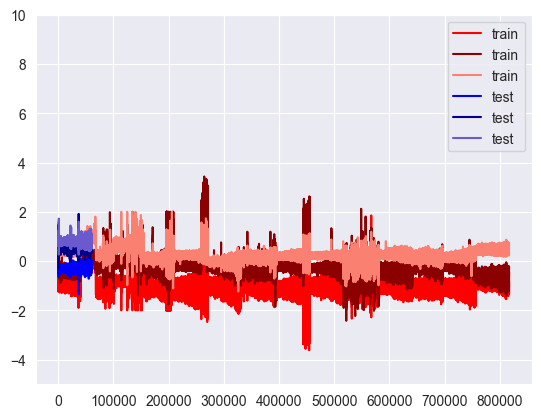

Participants 10


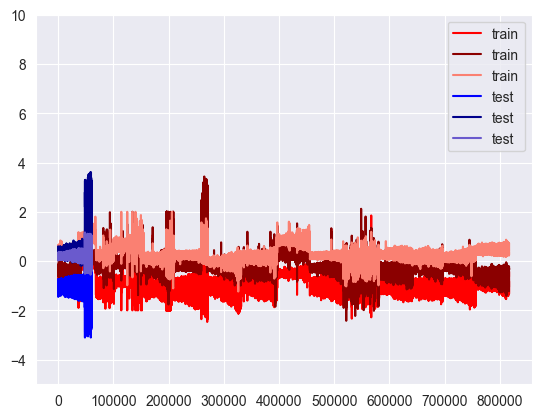

Participants 12


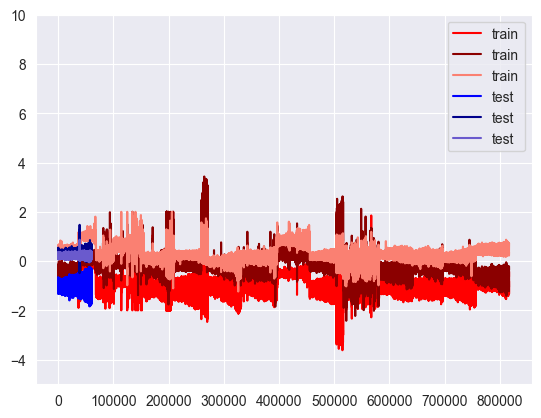

Participants 13


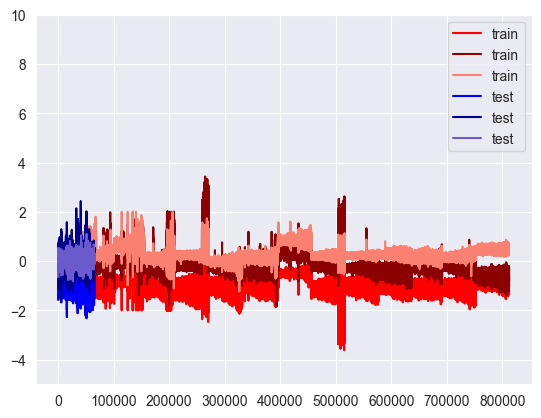

Participants 14


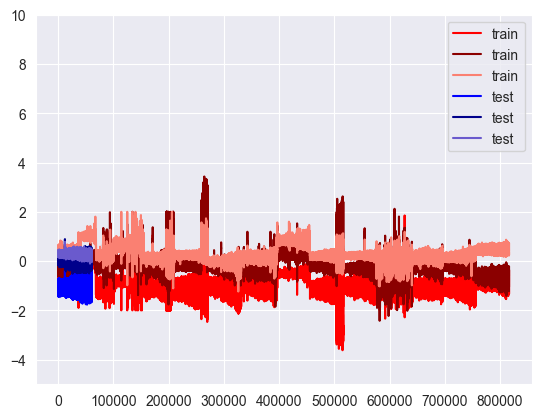

Participants 15


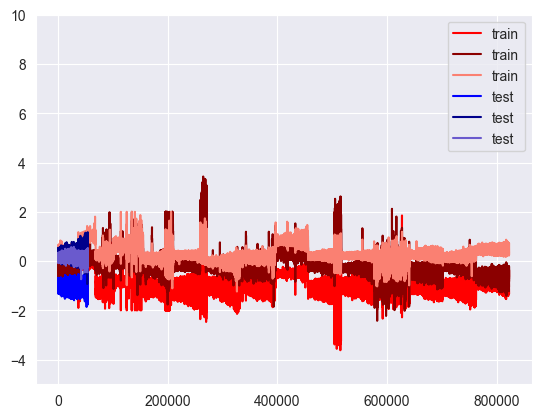

Participants 16


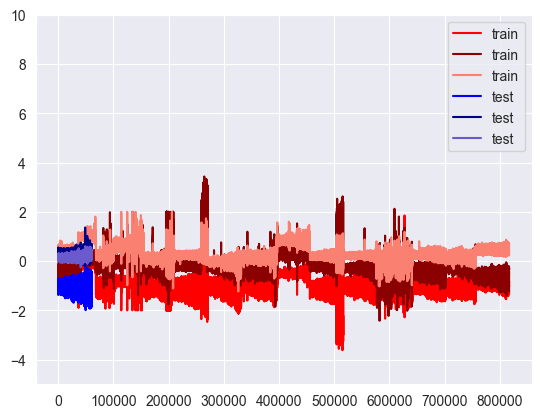

Participants 17


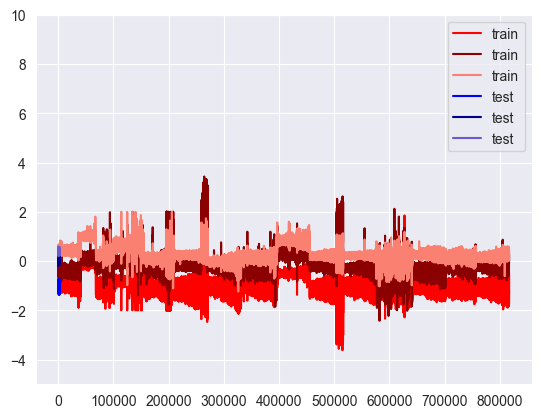

Participants 1


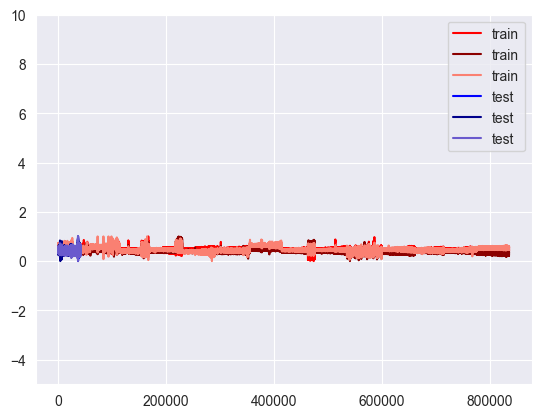

Participants 2


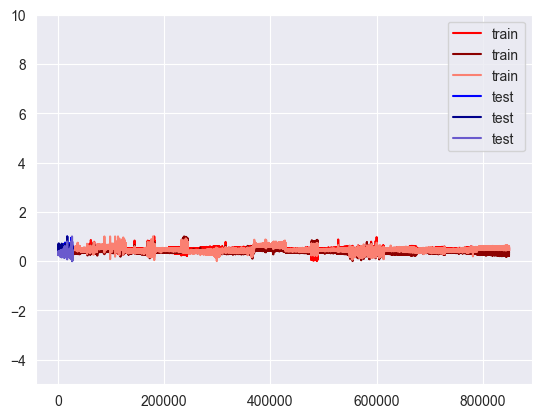

Participants 3


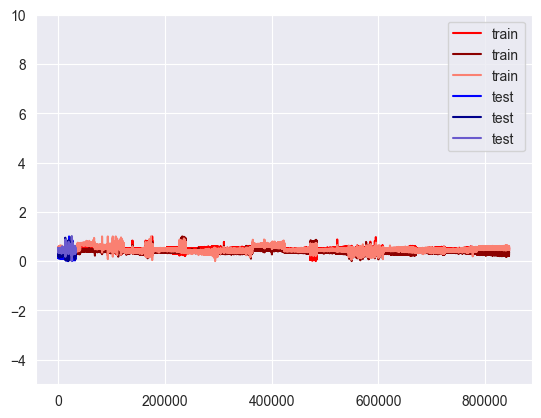

Participants 4


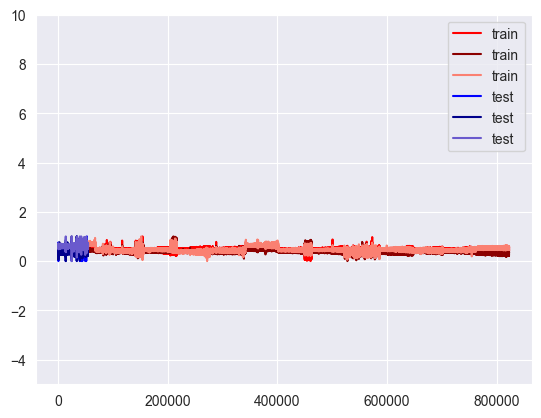

Skipping cv 5
Participants 6


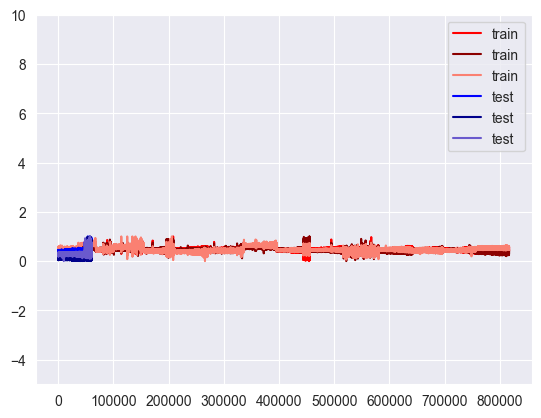

Participants 7


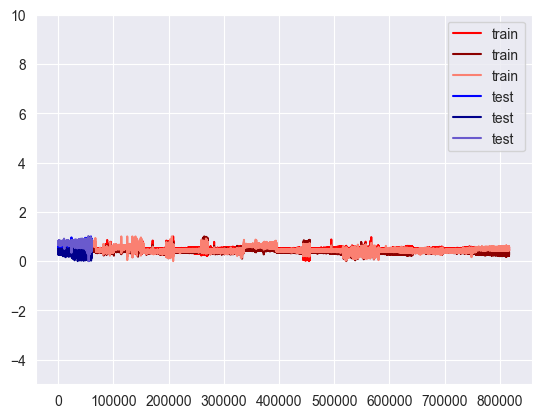

Participants 8


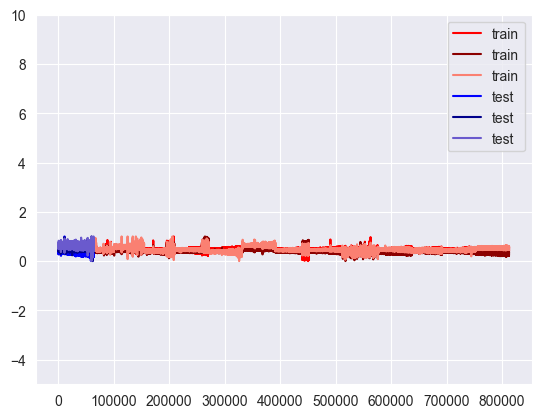

Participants 9


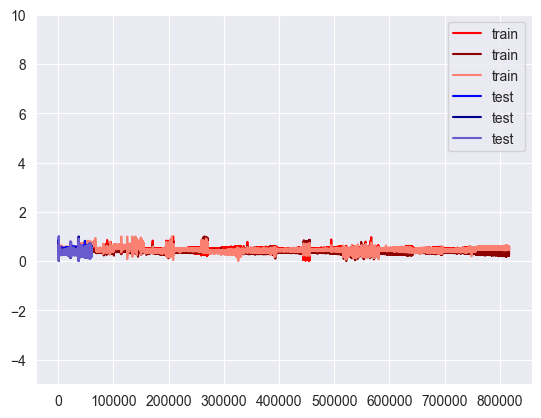

Participants 10


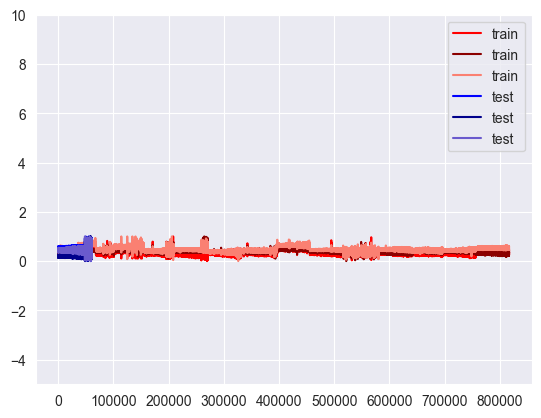

Participants 12


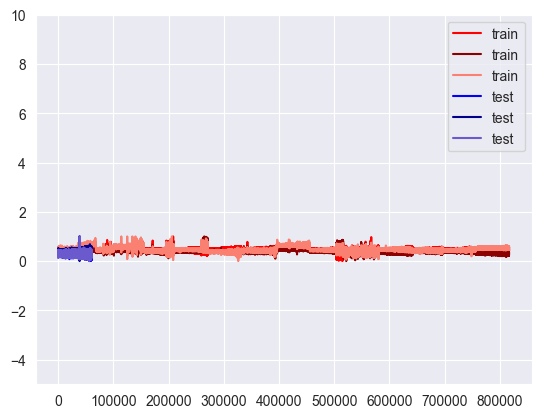

Participants 13


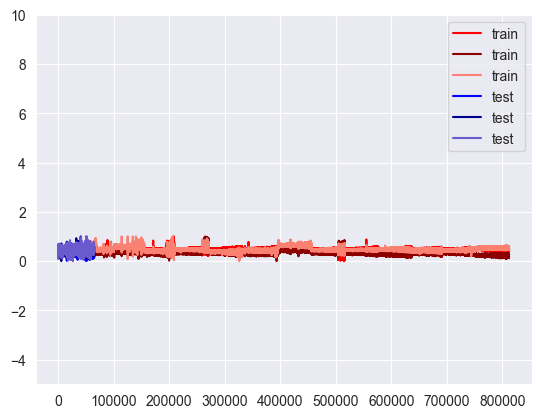

Participants 14


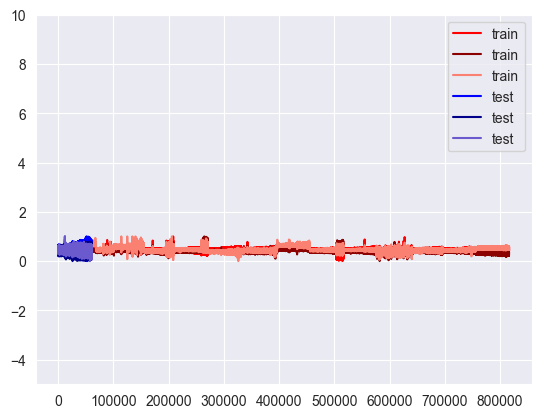

Participants 15


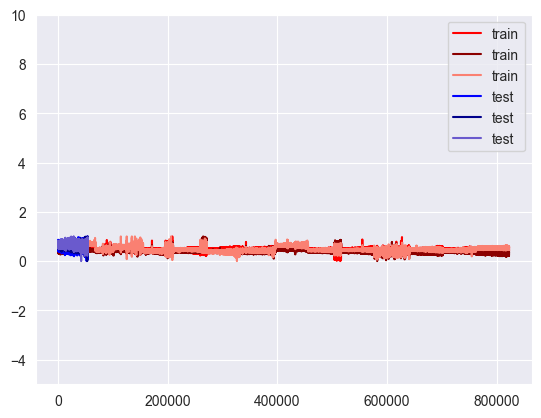

Participants 16


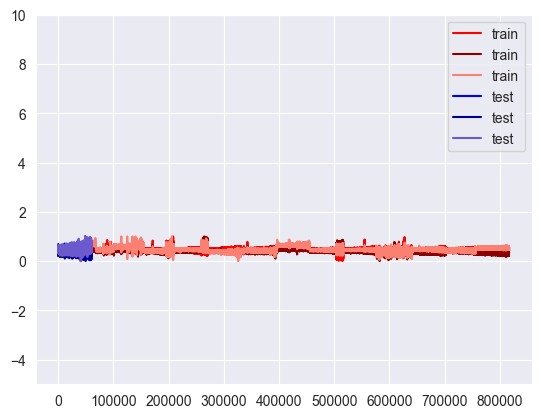

Participants 17


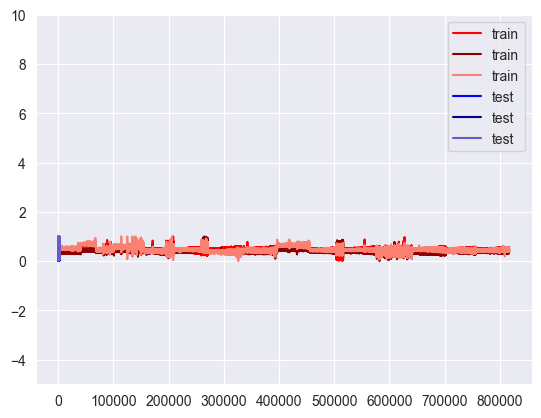

In [42]:
show = True
for i in participants:
    j = 0
    # filter out the activity in focus
    full_1_x_activity = full_1_x[full_1_x['activity_id'] == j]
    full_2_x_activity = full_2_x[full_2_x['activity_id'] == j]
    train = full_1_x_activity[full_1_x_activity['sub_id'] != i]
    test = full_2_x_activity[full_2_x_activity['sub_id'] == i]

    train = normalization(train)
    test = normalization(test)

    # if either of the test and train is empty, skip the cv. empty due to data missing.
    if train.shape[0] == 0 or test.shape[0] == 0:
        print('Skipping cv', i)
        continue

    # drop the activity column
    train = train.drop(columns=['activity_id'])
    test = test.drop(columns=['activity_id'])

    # get only the 'Acc_X', 'Acc_Y', 'Acc_Z' columns as numpy matrix
    train = train.iloc[:, 1:-1].to_numpy()
    test = test.iloc[:, 1:-1].to_numpy()
    print('Participants', i)
    if show:
        # plot the first 1100 to 1200 samples of the train and test data
        plt.plot(train[:, 0], label='train', color = 'red')
        plt.plot(train[:, 1], label='train', color = 'darkred')
        plt.plot(train[:, 2], label='train', color = 'salmon')
        plt.plot(test[:, 0], label='test', color = 'blue')
        plt.plot(test[:, 1], label='test', color = 'darkblue')
        plt.plot(test[:, 2], label='test', color = 'slateblue')
        # set the graph y limit to -2 to 4
        plt.ylim(-5, 10)
        plt.legend()
        plt.show()
        # show = False

In [41]:
show = False
for i in participants:
    # for j in activities:
    j = 0
    # filter out the activity in focus
    full_1_x_activity = full_1_x[full_1_x['activity_id'] == j]
    full_2_x_activity = full_2_x[full_2_x['activity_id'] == j]
    print('Starting cv', i)
    train = full_1_x_activity[full_1_x_activity['sub_id'] != i]
    test = full_2_x_activity[full_2_x_activity['sub_id'] == i]

    train = normalization(train)
    test = normalization(test)

    # if either of the test and train is empty, skip the cv. empty due to data missing.
    if train.shape[0] == 0 or test.shape[0] == 0:
        print('Skipping cv', i)
        continue

    # drop the activity column
    train = train.drop(columns=['activity_id'])
    test = test.drop(columns=['activity_id'])

    # get only the 'Acc_X', 'Acc_Y', 'Acc_Z' columns as numpy matrix
    train = train.iloc[:, 1:-1].to_numpy()
    test = test.iloc[:, 1:-1].to_numpy()

    print('Participants', i)
    print('Activity', j)
    # print the train and test shape
    print('train shape', train.shape)
    print('test shape', test.shape)


Starting cv 1
Participants 1
Activity 0
train shape (835684, 3)
test shape (41268, 3)
Starting cv 2
Participants 2
Activity 0
train shape (849698, 3)
test shape (27237, 3)
Starting cv 3
Participants 3
Activity 0
train shape (844816, 3)
test shape (32125, 3)
Starting cv 4
Participants 4
Activity 0
train shape (822485, 3)
test shape (54479, 3)
Starting cv 5
Skipping cv 5
Starting cv 6
Participants 6
Activity 0
train shape (816643, 3)
test shape (60330, 3)
Starting cv 7
Participants 7
Activity 0
train shape (816662, 3)
test shape (60307, 3)
Starting cv 8
Participants 8
Activity 0
train shape (812610, 3)
test shape (64367, 3)
Starting cv 9
Participants 9
Activity 0
train shape (816636, 3)
test shape (60337, 3)
Starting cv 10
Participants 10
Activity 0
train shape (816554, 3)
test shape (60417, 3)
Starting cv 12
Participants 12
Activity 0
train shape (816651, 3)
test shape (60321, 3)
Starting cv 13
Participants 13
Activity 0
train shape (811816, 3)
test shape (65161, 3)
Starting cv 14
Parti